In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

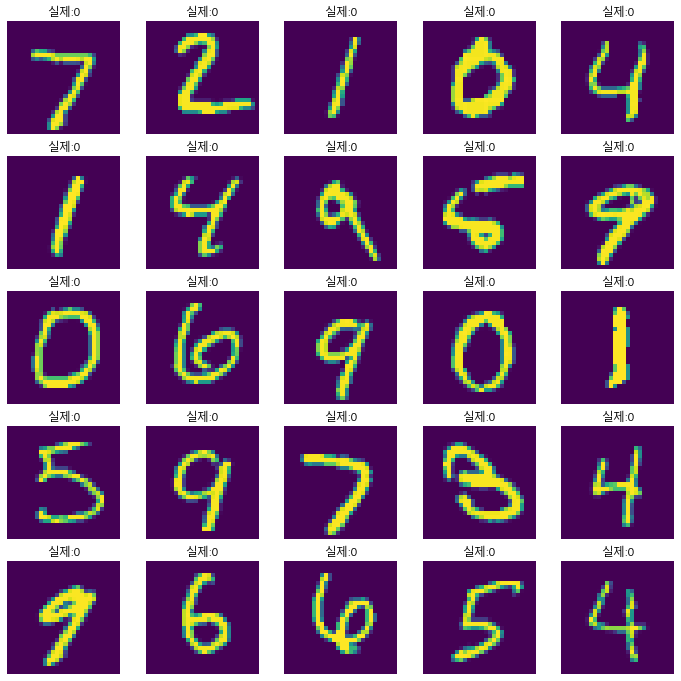

In [15]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (12,12)
plt.rc("font", family="Malgun Gothic")
fig, axarr = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3) 
# axarr[0,0].imshow(x_test[0].reshape(width, height))
for i in range(plt_row*plt_col):
    sub_plot = axarr[i//5, i%5]
    sub_plot.imshow(x_test[i].reshape(width, height))
    sub_plot.axis('off')
    sub_plot.set_title("실제:"+str(np.argmax(y_test[i])))

# DNN

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2228 - accuracy: 0.9318 - val_loss: 0.1120 - val_accuracy: 0.9655
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0961 - accuracy: 0.9705 - val_loss: 0.1006 - val_accuracy: 0.9702
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.0981 - val_accuracy: 0.9724
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.1194 - val_accuracy: 0.9673
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0843 - val_accuracy: 0.9772
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0935 - val_accuracy: 0.9758
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.1102 - val_accuracy:

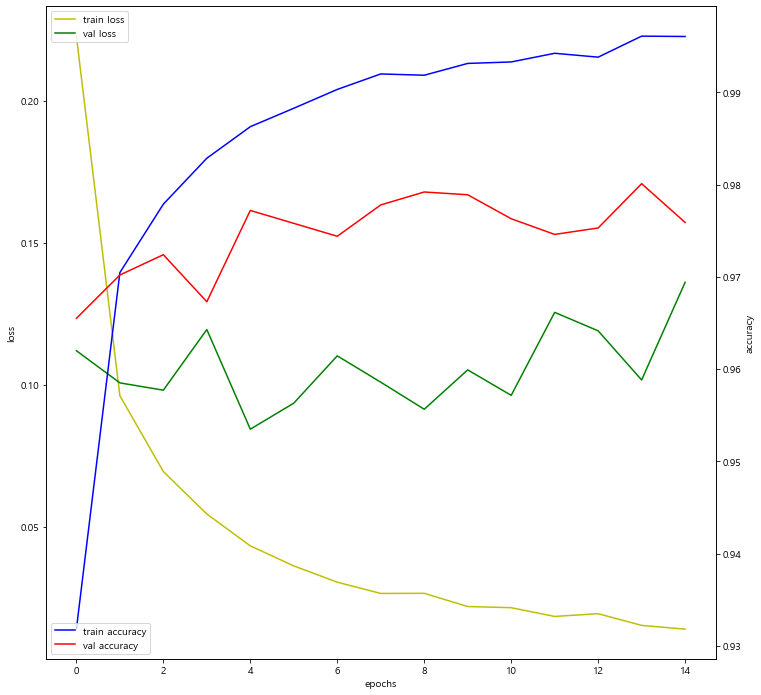

In [16]:
# 1. 데이터 셋 생성
width=28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32')/255.0
x_test  = x_test.reshape(10000, width*height).astype('float32')/255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 생성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(128, input_dim=width*height, activation='relu'))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 4. 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32,
                validation_data=(x_val, y_val),
                callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9772


[0.1290864795446396, 0.9771999716758728]

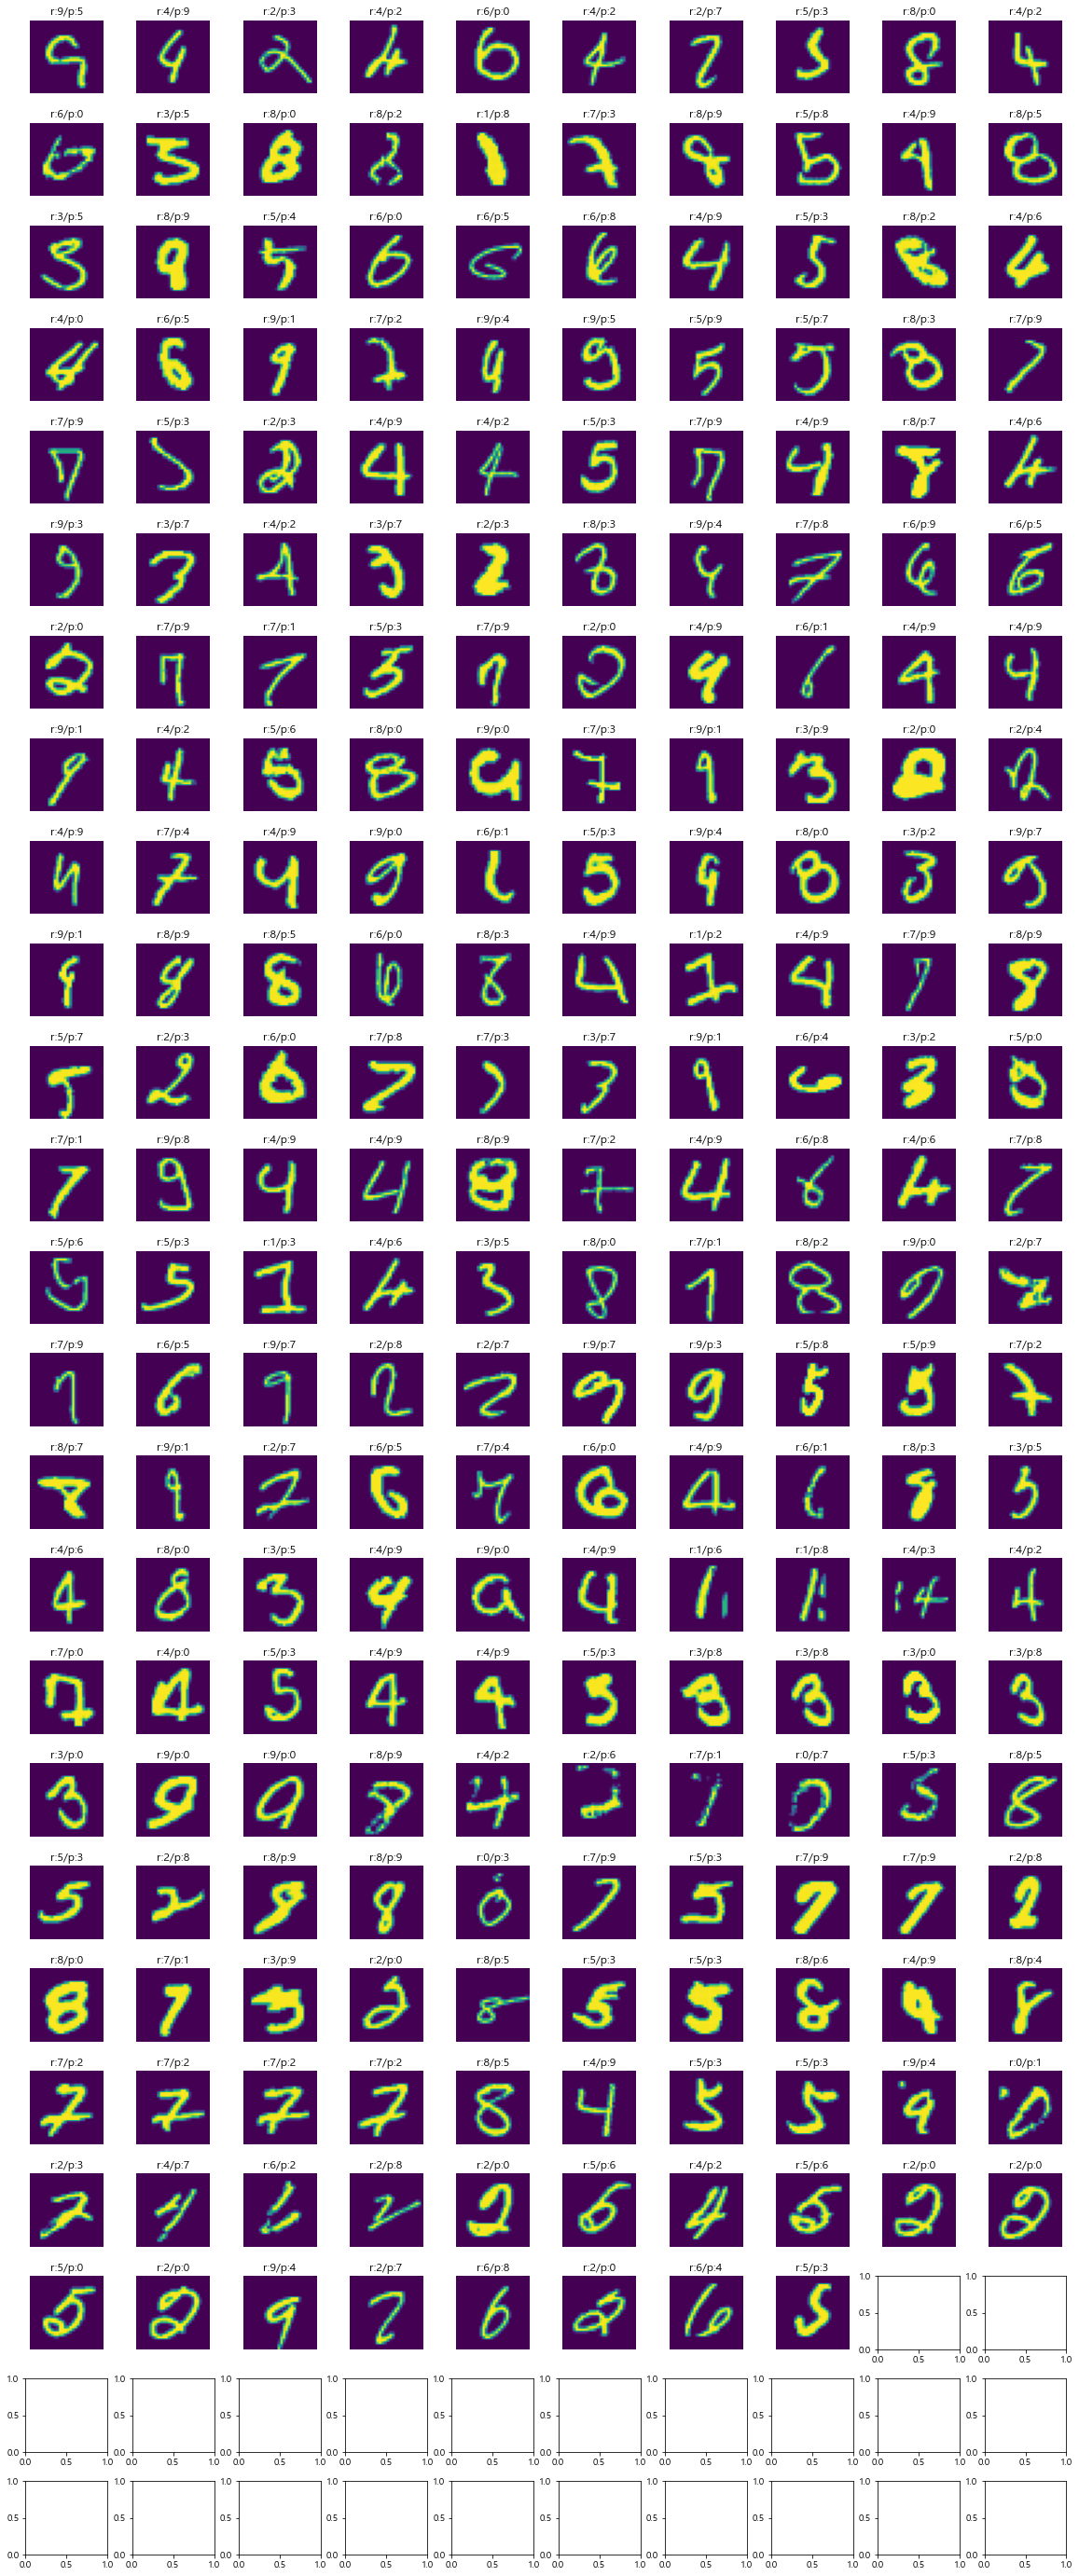

In [29]:
# 모델을 사용하여 예측이 틀린 데이터만 출력
yhat = model.predict(x_test).argmax(axis=1) # 예측치
y = y_test.argmax(axis=1) # 실제값

plt_row = 25
plt_col = 10
plt.rcParams['figure.figsize'] = (20,50)
fig, axarr = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3) 

i = 0   # yhat과 y를 액세스할 index
cnt = 0 # 출력횟수
while (cnt < (plt_row*plt_col) ) & (i<len(y)):
    if yhat[i] == y[i]:
        i += 1
        continue
    sub_plot = axarr[cnt//10, cnt%10]
    sub_plot.imshow(x_test[i].reshape(width, height))
    sub_plot.axis('off')
    title = 'r:'+str(y[i])+"/p:"+str(yhat[i])
    sub_plot.set_title(title)
    i += 1
    cnt += 1

# CNN(컨볼루션 레이어 포함)

Epoch 1/30
1563/1563 [==============================] - 41s 26ms/step - loss: 0.1527 - accuracy: 0.9513 - val_loss: 0.0518 - val_accuracy: 0.9850
Epoch 2/30
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 3/30
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0361 - val_accuracy: 0.9895
Epoch 4/30
1563/1563 [==============================] - 41s 26ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0409 - val_accuracy: 0.9897
Epoch 5/30
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0345 - val_accuracy: 0.9906
Epoch 6/30
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0351 - val_accuracy: 0.9903
Epoch 7/30
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0348 -

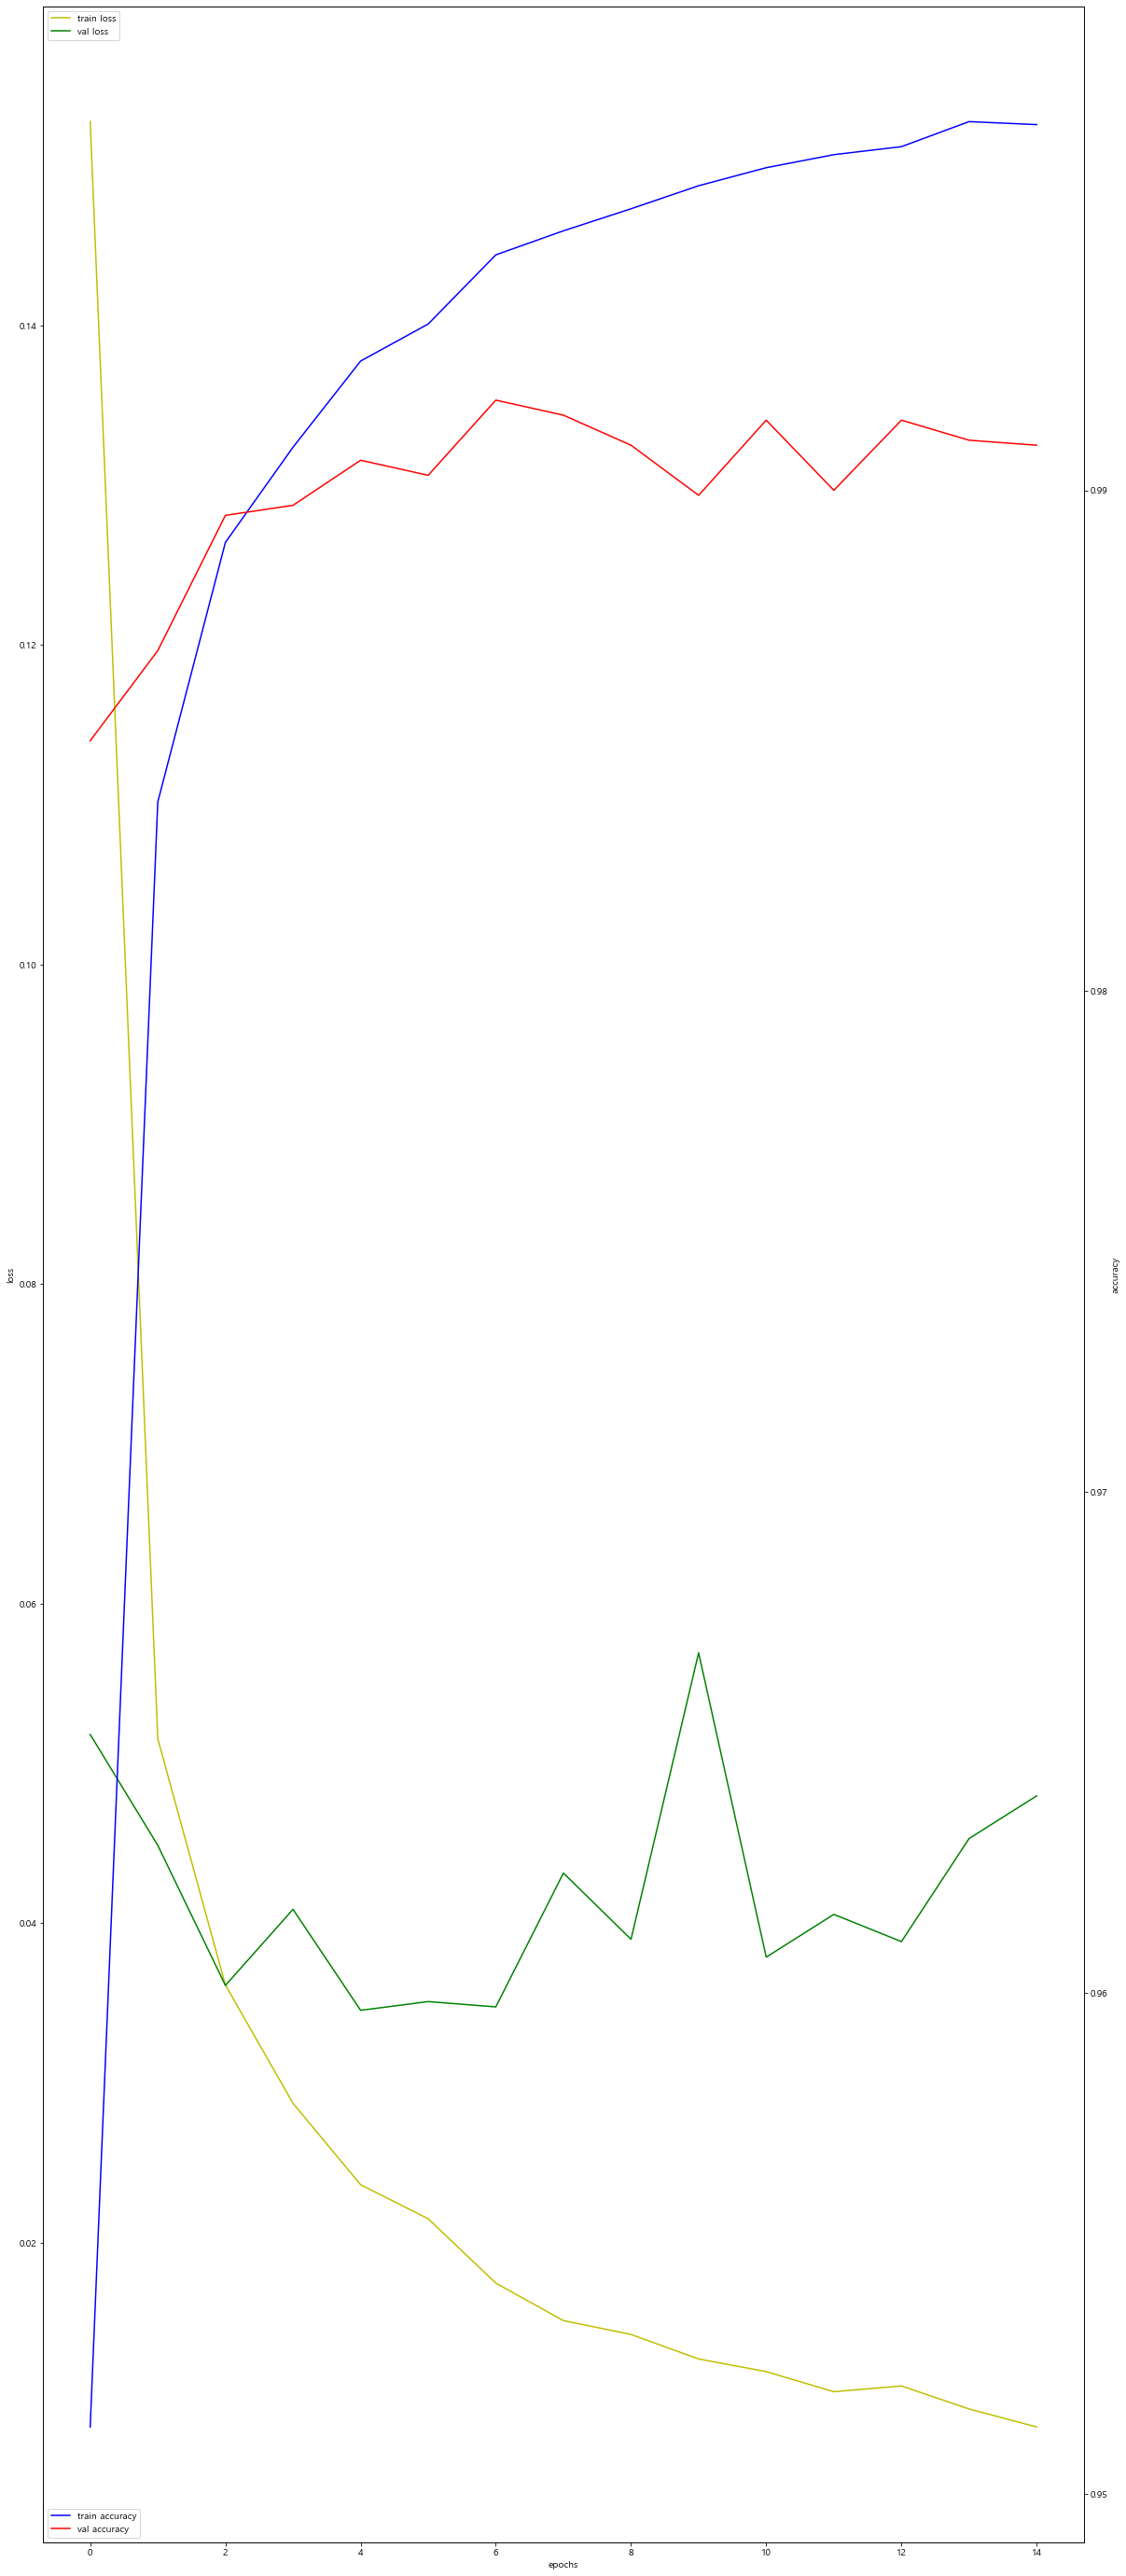

In [34]:
# 1. 데이터 셋 생성
width=28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32')/255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32')/255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 생성
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 4. 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32,
                validation_data=(x_val, y_val),
                callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

In [35]:
score = model.evaluate(x_test, y_test, batch_size=50)

200/200 [==============================] - 2s 8ms/step - loss: 0.0426 - accuracy: 0.9906


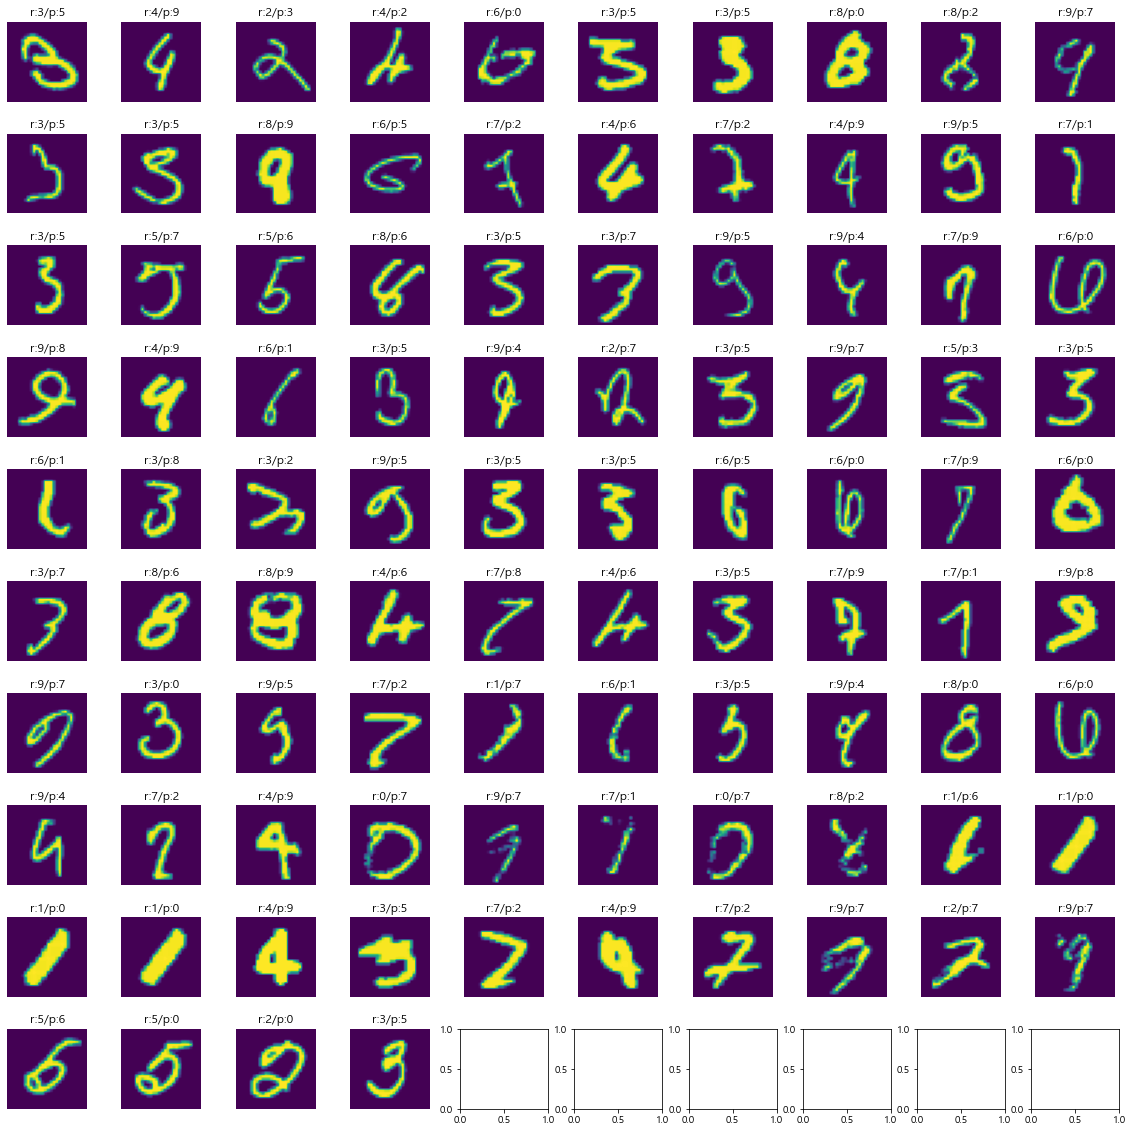

In [36]:
# 모델을 사용하여 예측이 틀린 데이터만 출력
yhat = model.predict(x_test).argmax(axis=1) # 예측치
y = y_test.argmax(axis=1) # 실제값

plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (20,20)
fig, axarr = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3) 

i = 0   # yhat과 y를 액세스할 index
cnt = 0 # 출력횟수
while (cnt < (plt_row*plt_col) ) & (i<len(y)):
    if yhat[i] == y[i]:
        i += 1
        continue
    sub_plot = axarr[cnt//10, cnt%10]
    sub_plot.imshow(x_test[i].reshape(width, height))
    sub_plot.axis('off')
    title = 'r:'+str(y[i])+"/p:"+str(yhat[i])
    sub_plot.set_title(title)
    i += 1
    cnt += 1